In [143]:
import pandas as pd

import sys
import os
import shutil

import numpy as np
import pandas as pd

from skimage import io
import cv2
import PIL as Image
from scipy import ndimage, misc
import matplotlib.pyplot as plt
%matplotlib inline
import fnmatch

import Augmentor

sys.path.append("../")

from utils import myImg2 as myimg
from utils import config as cutil


In [144]:
#initialize key variables.

cdir = '/disk1/data1/ret/gpu_tf/'
ddir = '/disk1/data1/data/'
imgdir = ddir  + 'px_he1/'
o_imgdir = ddir + 'ex/'
model_dir = ddir + 'models/inception/'
model_name = 'incep_lab_he77.cpkt'
iconfig = cutil.Config(configid='c1',cdir=cdir)

In [145]:
#get Image
def get_img(ipath):
    return myimg.myImg( imageid=ipath, config=iconfig, path=ipath)


In [146]:
#get image form npy
def get_img_from_npy(ipath):
    return np.load(ipath)

In [147]:
#display patches
def show_patch(img_id,patch_id):
    '''
    oi_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_oi.npy')
    ti_im = get_img_from_npy( imgdir + img_id + '_' + patch_id + '_ti.npy')
    '''
    for i in range(4000):
      if os.path.exists(imgdir + img_id + '_' + str(i) + '_oi.npy'):
        oi_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_oi.npy')
        ti_im = get_img_from_npy( imgdir + img_id + '_' + str(i) + '_ti.npy')
        if (ti_im/255).sum() > 5000:
            print("img_id[{}] sum ti_im[{}] size ti_im[{}] max pi[{}]".
                  format(img_id + '_' + str(i),ti_im.sum()/255,ti_im.shape,ti_im.max())) 
            ti2 = ndimage.zoom(ti_im,2)
            show_images([oi_im.astype(np.uint8),ti_im.astype(np.uint8),ti2.astype(np.uint8)])
            break
    
    '''
    #stack images side by side
    img_hstack = np.hstack((oi_im, ti_im))
    img_hconcat = np.concatenate((oi_im, ti_im), axis=1)
    cv2.imshow(' img_hconcat patch - [' + str(i) + ']', img_hconcat.astype(np.float32)/255) 
    '''
    #show_images([oi_im.astype(np.uint8),ti_im])
    #print(oi_im)
    #print(ti_im)
    
#show_patch('IDRiD_050','1815')

In [148]:
def show_images(images: list) -> None:
    n: int = len(images)
    f = plt.figure()
    for i in range(n):
        # Debug, plot figure
        f.add_subplot(1, n, i + 1)
        plt.imshow(images[i])

    plt.show(block=True)
    
def show_main_image(img_id):
    o_img = get_img(o_imgdir + 'images/' + img_id + '.jpg').getImage()
    t_img = get_img(o_imgdir + 'gt/' + img_id + '_HE.jpg').getImage()
    other_dir = 'idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/'
    other_img = get_img(ddir + other_dir + img_id + '_HE.jpg').getImage()
    i1 = ndimage.zoom(other_img,2)
    #i2 = ndimage.zoom(other_img,3)
    #i3 = ndimage.zoom(other_img,4)
    
    show_images([o_img,t_img,other_img,i1])

#idrid/IDRID_sharable_data/images_with_ground_truth/DRIVE/training_HE/1st_manual/IDRiD_50_HE.jpg
img_id = 'IDRiD_050'
#show_main_image(img_id)

Processing <PIL.Image.Image image mode=RGB size=64x64 at 0x7F706676EE10>: 100%|██████████| 2/2 [00:00<00:00, 73.08 Samples/s]

Initialised with 1 image(s) found.
Output directory set to /disk1/data1/data/px_he1/img1/output.1 ground truth image(s) found.
#images[1] n_rows[1] n_cols[1] print_size[6]


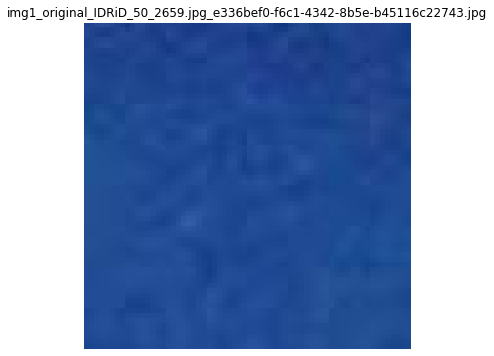

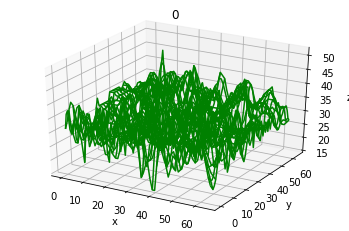

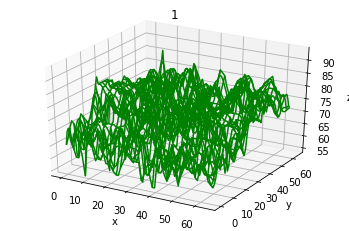

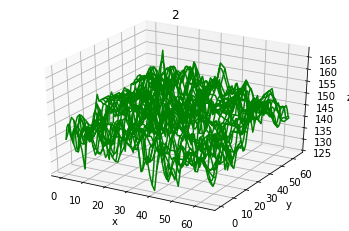

#images[1] n_rows[1] n_cols[1] print_size[6]


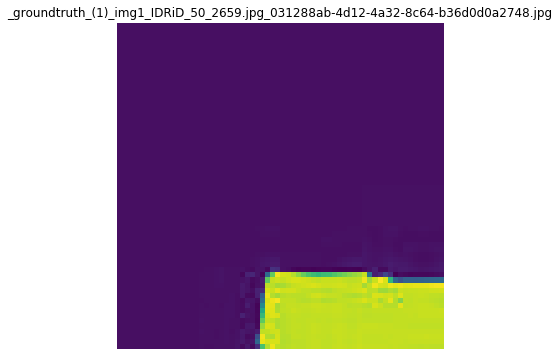

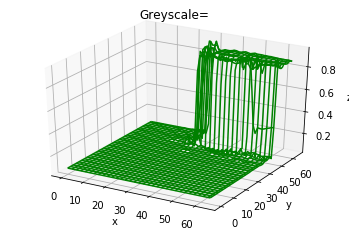

#images[1] n_rows[1] n_cols[1] print_size[6]


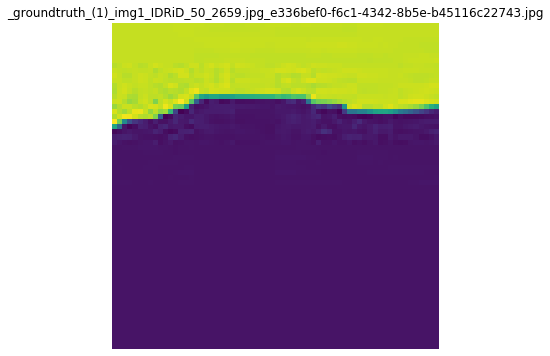

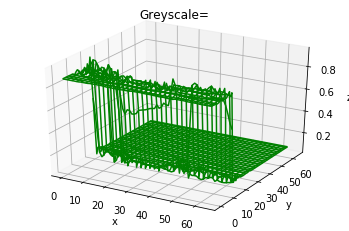

#images[1] n_rows[1] n_cols[1] print_size[6]


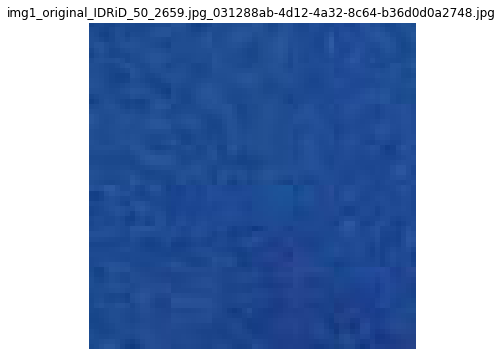

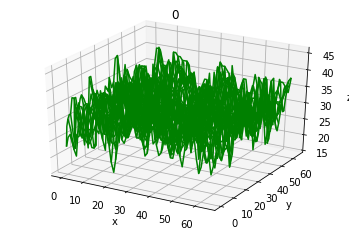

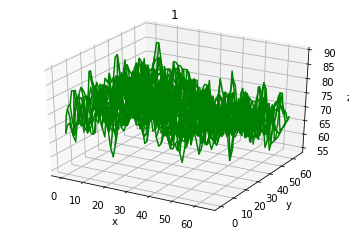

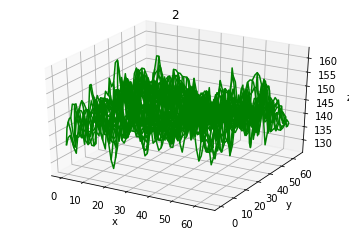

In [149]:
#display patches
def show_image_grid(images: list, img_names: list,img_per_row: int = 2) -> None:
    n: int = len(images)
    n_cols = int(n/img_per_row)
    print_size = int(images[0].shape[0]/10)
    f = plt.figure(figsize=(print_size,print_size))
    print("#images[%d] n_rows[%d] n_cols[%d] print_size[%d]" % (n,img_per_row,n_cols,print_size))
    for i in range(n):
        #for j in range(img_per_row):
        #print(i,img_per_row,n_cols)
        # Debug, plot figure
        f.add_subplot( n_cols, img_per_row, i+1)
        plt.title(img_names[i])
        plt.axis('off')
        #plt.imshow(images[(i*img_per_row+j)])
        plt.imshow(images[i])
    plt.show(block=True)
    
def check_patches(img_id: str,patch_ids: list, pi=False):
    images = []
    img_names = []
    for patch_id in patch_ids:
        #print(img_id,patch_id)
        img_name = img_id + '_' + str(patch_id)
        oi_im = get_img_from_npy( imgdir + 'images/' + img_name + '.npy')
        images.append(oi_im.astype(np.uint8))
        img_names.append(img_name)

        ti_im = get_img_from_npy( imgdir + 'gt/' + img_name + '.npy')
        images.append(ti_im.astype(np.uint8))
        img_names.append(img_name)

        if pi:
            pi_im = get_img_from_npy( imgdir + 'images/' + img_name + '_pi.npy')
            images.append(pi_im.astype(np.uint8))
            img_names.append(img_name)
    #show_images([oi_im.astype(np.uint8),ti_im.astype(np.uint8)])
    print(len(images))
    if pi:
        show_image_grid(images, img_names, img_per_row=3)
    else:
        show_image_grid(images, img_names, img_per_row=2)
    #show_images([oi_im.astype(np.uint8),ti_im])
    #print(oi_im)
    #print(ti_im)

def plot_3d( Z, w=None, h=None, title='surface'):
    x = np.linspace( 0, w, w)
    y = np.linspace( 0, h, h)
    X, Y = np.meshgrid(x,y)
    '''
    print(" X - ",X.shape)
    print(" Y - ",Y.shape)
    print(" Z - ",Z.shape)
    '''

    fig = plt.figure()
    ax = plt.axes(projection="3d")
    #ax.plot_wireframe(X, Y, Z, color='green', rstride=10, cstride=10)
    ax.plot_wireframe(X, Y, Z, color='green')
    #ax.plot_wireframe(X, Y, Z, rstride=10, cstride=10,cmap='winter', edgecolor='none')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.set_title(title)

    plt.show()
    
def data_aug(img_id: str,patch_ids: list):
    images = []
    img_names = []
    image_dir = 'img1'
    gt_dir = 'gt1'
    '''
    for patch_id in patch_ids:
        #print(img_id,patch_id)
        img_name = img_id + '_' + str(patch_id)
        oi_im = get_img_from_npy( imgdir + 'images/' + img_name + '.npy')
        images.append(oi_im.astype(np.uint8))
        img_names.append(img_name)
    '''

    p = Augmentor.Pipeline( imgdir + image_dir)
    p.ground_truth( imgdir + gt_dir)
    
    # First, we add a horizontal flip operation to the pipeline:
    p.flip_left_right(probability=0.4)

    # Now we add a vertical flip operation to the pipeline:
    p.flip_top_bottom(probability=0.8)

    # Add a rotate90 operation to the pipeline:
    p.rotate90(probability=0.1)

    # Zoom
    p.zoom_random(probability=0.5, percentage_area=0.8)
    p.flip_top_bottom(probability=0.5)
    p.random_distortion(probability=1, grid_width=4, grid_height=4, magnitude=8)
    p.crop_random(probability=1, percentage_area=0.5)
    #p.resize(probability=1.0, width=120, height=120)

    p.sample(2)
    #p.process()
    #print(len(augmented_images),len(labels),type(augmented_images))
    odir = imgdir + image_dir + '/output/'
    da_image_dir = imgdir + 'da_img'
    da_gt_dir = imgdir + 'da_gt'
    o_file_pattern = '*_original_*'
    gt_file_pattern = '*_groundtruth_*'
    files = os.listdir(odir)
    m_files = []
    i=0
    for filename in files:
        #if i > 3:
        #    break
        #print(fnmatch.fnmatch(filename, file_pattern))
        #print(filename)
        o_img_fl = filename        
        if fnmatch.fnmatch(filename, o_file_pattern):
            o_img = plt.imread( odir + o_img_fl)
        if fnmatch.fnmatch(filename, gt_file_pattern):
            o_img = io.imread( odir + o_img_fl, as_gray=True)

        #print("o_file_pattern matched...shape is ",o_img.shape)
        show_image_grid([o_img], [o_img_fl], img_per_row=1)
        
        images.append(o_img)
        img_names.append(o_img_fl)
        if len(o_img.shape) > 2:
            for j in range(o_img.shape[2]):
                Z = o_img[:,:,j]
                if o_img.shape[0] < o_img.shape[1]:
                  Z = Z.transpose((1,0))
                plot_3d(Z,w=o_img.shape[0],h=o_img.shape[1],title=str(j))
        else:
            plot_3d(Z=o_img,w=o_img.shape[0],h=o_img.shape[1],title='Greyscale=')
        '''
        if fnmatch.fnmatch(filename, file_pattern):
           o_img_fl = filename
           images.append(plt.imread(odir + o_img_fl))
           img_names.append(o_img_fl)
            
           gt_img_fl = '_groundtruth_(1)_' + filename 
           images.append(plt.imread(odir + gt_img_fl))
           img_names.append(gt_img_fl)
        '''
        i += 1
        
    #show_image_grid(images, img_names, img_per_row=1)
    #show_image_grid(images[4:], img_names, img_per_row=1)

    
indexs = [4392,2138,4393,4473,2139,2058,4551,2137,4472,4552,4391,2059,4394,127]
indexs_78 = [2929, 1820, 3647, 1660, 3007, 3484, 3404, 3648, 1902, 1901, 1822]
indexs_50 = [2659,1744,2342,2501]
#check_patches('IDRiD_50',indexs_50[:4],pi=False)
data_aug('IDRiD_50',indexs_50)
